# Análisis de Covid en CABA
Trabajaremos con el dataset con los casos y muertes de COVID de la Ciudad Autónoma de Buenos Aires (CABA)

El dataset lo podes descargar aquí:

https://data.buenosaires.gob.ar/dataset/casos-covid-19

La información es actualizada diariamente.


__1) Descargamos las librerías necesarias__

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
raw_data = pd.read_csv('https://cdn.buenosaires.gob.ar/datosabiertos/datasets/salud/casos-covid-19/casos_covid19.csv') #Dataset CRUDO

C:\Users\Samsung\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (10,11,13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
raw_data.head()

,numero_de_caso,fecha_apertura_snvs,fecha_toma_muestra,fecha_clasificacion,provincia,barrio,comuna,genero,edad,clasificacion,fecha_fallecimiento,fallecido,fecha_alta,tipo_contagio
0,16276029,07JUL2021:00:00:00.000000,07JUL2021:00:00:00.000000,07JUL2021:00:00:00.000000,CABA,VILLA DEVOTO,11.0,femenino,39.0,confirmado,NaN,NaN,NaN,Comunitario
1,16276034,07JUL2021:00:00:00.000000,07JUL2021:00:00:00.000000,07JUL2021:00:00:00.000000,Buenos Aires,NaN,NaN,femenino,38.0,confirmado,NaN,NaN,NaN,Comunitario
2,16276037,07JUL2021:00:00:00.000000,07JUL2021:00:00:00.000000,07JUL2021:00:00:00.000000,Buenos Aires,NaN,NaN,femenino,29.0,confirmado,NaN,NaN,NaN,Comunitario
3,16276041,07JUL2021:00:00:00.000000,07JUL2021:00:00:00.000000,07JUL2021:00:00:00.000000,Buenos Aires,NaN,NaN,femenino,11.0,confirmado,NaN,NaN,NaN,Comunitario
4,16276046,07JUL2021:00:00:00.000000,07JUL2021:00:00:00.000000,07JUL2021:00:00:00.000000,CABA,NUÑEZ,13.0,femenino,24.0,confirmado,NaN,NaN,NaN,Comunitario


In [4]:
raw_data.tail()

,numero_de_caso,fecha_apertura_snvs,fecha_toma_muestra,fecha_clasificacion,provincia,barrio,comuna,genero,edad,clasificacion,fecha_fallecimiento,fallecido,fecha_alta,tipo_contagio
3373925,16276002,07JUL2021:00:00:00.000000,07JUL2021:00:00:00.000000,07JUL2021:00:00:00.000000,Buenos Aires,NaN,NaN,masculino,28.0,confirmado,NaN,NaN,NaN,En Investigación
3373926,16276012,07JUL2021:00:00:00.000000,07JUL2021:00:00:00.000000,07JUL2021:00:00:00.000000,CABA,LINIERS,9.0,femenino,28.0,confirmado,NaN,NaN,NaN,Comunitario
3373927,16276015,07JUL2021:00:00:00.000000,07JUL2021:00:00:00.000000,07JUL2021:00:00:00.000000,CABA,FLORESTA,10.0,femenino,38.0,confirmado,NaN,NaN,NaN,Contacto
3373928,16276019,07JUL2021:00:00:00.000000,07JUL2021:00:00:00.000000,07JUL2021:00:00:00.000000,CABA,FLORES,7.0,masculino,42.0,confirmado,NaN,NaN,NaN,Contacto
3373929,16276021,07JUL2021:00:00:00.000000,07JUL2021:00:00:00.000000,07JUL2021:00:00:00.000000,CABA,FLORES,7.0,masculino,2.0,confirmado,NaN,NaN,NaN,Contacto


In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3373930 entries, 0 to 3373929
Data columns (total 14 columns):
 #   Column               Dtype  
---  ------               -----  
 0   numero_de_caso       int64  
 1   fecha_apertura_snvs  object 
 2   fecha_toma_muestra   object 
 3   fecha_clasificacion  object 
 4   provincia            object 
 5   barrio               object 
 6   comuna               float64
 7   genero               object 
 8   edad                 float64
 9   clasificacion        object 
 10  fecha_fallecimiento  object 
 11  fallecido            object 
 12  fecha_alta           object 
 13  tipo_contagio        object 
dtypes: float64(2), int64(1), object(11)
memory usage: 360.4+ MB


In [6]:
raw_data.columns

Index(['numero_de_caso', 'fecha_apertura_snvs', 'fecha_toma_muestra',
       'fecha_clasificacion', 'provincia', 'barrio', 'comuna', 'genero',
       'edad', 'clasificacion', 'fecha_fallecimiento', 'fallecido',
       'fecha_alta', 'tipo_contagio'],
      dtype='object')

__- Queremos averiguar los valores relacionados con las columnas 'clasificacion' y 'tipo_contagio'__

In [7]:
raw_data['clasificacion'].unique()

array(['confirmado', 'descartado', 'sospechoso'], dtype=object)

In [8]:
raw_data['tipo_contagio'].unique()

array(['Comunitario', 'Contacto', 'En Investigación', nan,
       'Trabajador de la Salud', 'Importado'], dtype=object)

 __3) Chequeamos los NaN values__

In [9]:
raw_data.count()

numero_de_caso         3373930
fecha_apertura_snvs    3373930
fecha_toma_muestra     3370064
fecha_clasificacion    3373930
provincia              3359419
barrio                 1851845
comuna                 1851845
genero                 3373930
edad                   3373284
clasificacion          3373930
fecha_fallecimiento      18648
fallecido                18648
fecha_alta              105325
tipo_contagio           866132
dtype: int64

In [10]:
raw_data.isna().any()

numero_de_caso         False
fecha_apertura_snvs    False
fecha_toma_muestra      True
fecha_clasificacion    False
provincia               True
barrio                  True
comuna                  True
genero                 False
edad                    True
clasificacion          False
fecha_fallecimiento     True
fallecido               True
fecha_alta              True
tipo_contagio           True
dtype: bool

In [11]:
raw_data.isna().sum() #suma de cada NaN por columna

numero_de_caso               0
fecha_apertura_snvs          0
fecha_toma_muestra        3866
fecha_clasificacion          0
provincia                14511
barrio                 1522085
comuna                 1522085
genero                       0
edad                       646
clasificacion                0
fecha_fallecimiento    3355282
fallecido              3355282
fecha_alta             3268605
tipo_contagio          2507798
dtype: int64

__4) Descartamos algunas columnas irrelevantes que no utilizaremos__


Descartamos por ejemplo las columnas 'fecha_apertura_snvs' y 'fecha_toma_muestra' ya que solo nos interesa 'fecha_clasificacion'


In [12]:
working_data = raw_data.drop(['fecha_apertura_snvs',
                              'fecha_toma_muestra',
                              'fecha_alta'], axis = 1).copy() #DATASET CON EL QUE TRABAJAREMOS PRIMEROS FILTROS (DROP COLUMNS Y FECHAS CONVERTIDAS EN DATEIME)
working_data.head()

,numero_de_caso,fecha_clasificacion,provincia,barrio,comuna,genero,edad,clasificacion,fecha_fallecimiento,fallecido,tipo_contagio
0,16276029,07JUL2021:00:00:00.000000,CABA,VILLA DEVOTO,11.0,femenino,39.0,confirmado,NaN,NaN,Comunitario
1,16276034,07JUL2021:00:00:00.000000,Buenos Aires,NaN,NaN,femenino,38.0,confirmado,NaN,NaN,Comunitario
2,16276037,07JUL2021:00:00:00.000000,Buenos Aires,NaN,NaN,femenino,29.0,confirmado,NaN,NaN,Comunitario
3,16276041,07JUL2021:00:00:00.000000,Buenos Aires,NaN,NaN,femenino,11.0,confirmado,NaN,NaN,Comunitario
4,16276046,07JUL2021:00:00:00.000000,CABA,NUÑEZ,13.0,femenino,24.0,confirmado,NaN,NaN,Comunitario


__5) Chequeamos si las rows contienen duplicados__


In [13]:
duplicate_rows_cases = working_data[working_data.duplicated()]
print('number of duplicate rows: ', duplicate_rows_cases.shape)

number of duplicate rows:  (0, 11)


Afortunadamente no tenemos ningun duplicado!

__- Podemos pedir información acerca de un solo row__

In [14]:
working_data.loc[457] #random row

numero_de_caso                          16582000
fecha_clasificacion    12JUL2021:00:00:00.000000
provincia                                   CABA
barrio                                  FLORESTA
comuna                                      10.0
genero                                  femenino
edad                                        26.0
clasificacion                         confirmado
fecha_fallecimiento                          NaN
fallecido                                    NaN
tipo_contagio                           Contacto
Name: 457, dtype: object

__6) Convertimos la col 'fecha_clasificacion' en un datetime__

In [15]:
working_data['fecha_clasificacion'] = pd.to_datetime(working_data['fecha_clasificacion'],
                                                     format='%d%b%Y:%H:%M:%S.%f')
working_data['fecha_fallecimiento'] = pd.to_datetime(working_data['fecha_fallecimiento'],
                                                     format='%d%b%Y:%H:%M:%S.%f')
working_data.sort_values('fecha_clasificacion') #sort by date

,numero_de_caso,fecha_clasificacion,provincia,barrio,comuna,genero,edad,clasificacion,fecha_fallecimiento,fallecido,tipo_contagio
720396,20521826,1961-01-21,Buenos Aires,NaN,NaN,masculino,60.0,descartado,NaT,NaN,NaN
1783987,1164212,1974-11-09,Buenos Aires,NaN,NaN,masculino,46.0,descartado,NaT,NaN,NaN
3202465,5733968,2002-12-27,CABA,SAN TELMO,1.0,femenino,63.0,descartado,NaT,NaN,NaN
3370545,1525260,2018-08-28,CABA,BALVANERA,3.0,masculino,48.0,descartado,NaT,NaN,NaN
3354344,1004366,2019-05-30,CABA,PALERMO,14.0,masculino,27.0,descartado,NaT,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
81548,21489929,2021-10-12,CABA,COLEGIALES,13.0,masculino,46.0,sospechoso,NaT,NaN,NaN
81547,21489922,2021-10-12,CABA,PALERMO,14.0,femenino,45.0,sospechoso,NaT,NaN,NaN
81546,21489812,2021-10-12,CABA,COLEGIALES,13.0,femenino,4.0,sospechoso,NaT,NaN,NaN
2531833,21495097,2021-10-12,CABA,ALMAGRO,5.0,masculino,22.0,descartado,NaT,NaN,NaN


__- Vemos que las primeras filas contienen fechas anteriores al 03/03/2020, día donde se detectó el primer caso positivo de covid en la Argentina. Por lo tanto eliminaremos todas las rows anteriores a esa fecha__ 

(** si queremos hacer un analisis de la cantidad de test entonces deberiamos averiguar cuando se empezó a testear y dejar TODOS los rows que pertenezcan al 2020 siempre y cuando no haya un positivo antes del 03/03 lo que sería imposible y demostraria que hay un error__

In [16]:
pre_inicio_covid = working_data[working_data['fecha_clasificacion']<'2020-02-29'].index
pre_inicio_covid

Int64Index([ 103452,  124180,  143701,  178735,  180983,  193369,  221485,
             313024,  326574,  340278,
            ...
            3126495, 3126497, 3127112, 3202465, 3288792, 3297144, 3354050,
            3354344, 3360032, 3370545],
           dtype='int64', length=193)

In [17]:
working_data.drop(pre_inicio_covid,
                  inplace = True)
working_data.sort_values('fecha_clasificacion',
                         inplace = True)
working_data.head()

,numero_de_caso,fecha_clasificacion,provincia,barrio,comuna,genero,edad,clasificacion,fecha_fallecimiento,fallecido,tipo_contagio
2028918,738161,2020-03-02,CABA,PALERMO,14.0,femenino,49.0,descartado,NaT,NaN,NaN
2595989,746678,2020-03-02,Buenos Aires,NaN,NaN,masculino,40.0,descartado,NaT,NaN,NaN
1189634,1368880,2020-03-02,Buenos Aires,NaN,NaN,femenino,37.0,confirmado,NaT,NaN,Trabajador de la Salud
2586738,733589,2020-03-02,Buenos Aires,NaN,NaN,masculino,21.0,descartado,NaT,NaN,NaN
867761,735046,2020-03-02,CABA,SAN CRISTOBAL,3.0,masculino,17.0,descartado,NaT,NaN,NaN


__7) Ya limpiamos el dataset. Ahora creamos 4 DF más a partir de working_data: POSITIVOS, FALLECIDOS, CASOS DIARIOS y MUERTES DIARIAS__

Quedando así 4 dataframes con los que trabajaremos: __working_data, positivos, fallecidos, casos_diarios y muertes_diarias__

Sabemos que el dataset contiene todos los test realizados en CABA, sin importar de donde sean residentes aquellos que se lo realizan.
Por lo tanto si queremos analizar los casos y fallecidos estrictamente de habitantes de CABA, entonces tenemos que filtrar tambíen unicamente a los de CABA a partir de la columna 'provincia'

In [18]:
positivos = working_data.query('provincia == "CABA" and clasificacion == "confirmado"').copy() #casos positivos
fallecidos = working_data.query('provincia == "CABA" and fallecido == "si"').copy() #los fallecidos
casos_diarios = pd.DataFrame({'Casos': positivos['fecha_clasificacion'].value_counts()}).sort_index() #casos diarios
muertes_diarias = pd.DataFrame({'Muertes' : fallecidos['fecha_fallecimiento'].value_counts()}).sort_index() #muertes diarias

Ya podemos hacer las primeras visualizaciones...

#### Primero trabajemos con working_data

__¿Cómo se distribuyen los tipos de clasificación?__

In [143]:
working_data['clasificacion'].value_counts()

descartado    2465563
confirmado     867737
sospechoso      40437
Name: clasificacion, dtype: int64

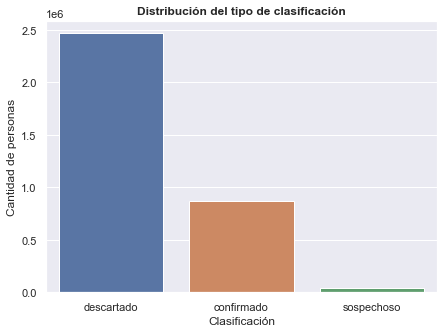

In [133]:
plt.figure(figsize = (7,5))
sns.set_theme(style="darkgrid", context = 'notebook')
sns.countplot(x = 'clasificacion', data = working_data)
plt.title('Distribución del tipo de clasificación',fontweight = 'bold')
plt.xlabel('Clasificación')
plt.ylabel('Cantidad de personas')
plt.show()

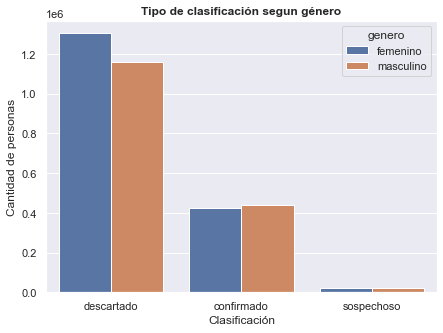

In [91]:
plt.figure(figsize = (7,5))
sns.countplot(x = 'clasificacion',
              hue = 'genero',
              data = working_data)
plt.title('Tipo de clasificación segun género', fontweight = 'bold' )
plt.xlabel('Clasificación')
plt.ylabel('Cantidad de personas')
plt.show()

__Ahora trabajemos solo con los positivos...__

In [117]:
#Distribucion del tipo de contagio
positivos['tipo_contagio'].value_counts()

Comunitario               391596
Contacto                   59808
En Investigación           37691
Trabajador de la Salud     15288
Importado                    356
Name: tipo_contagio, dtype: int64

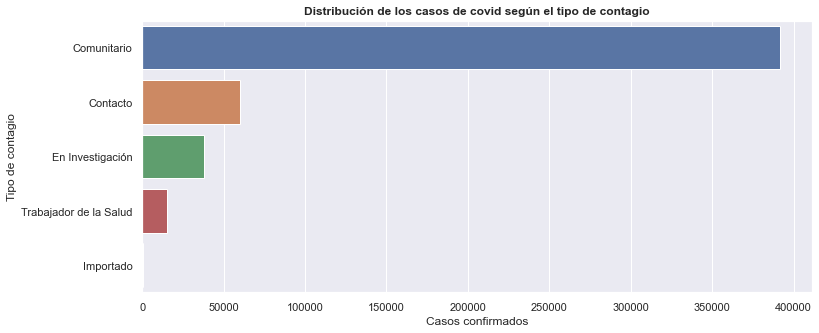

In [119]:
plt.figure(figsize = (12,5))
sns.set_theme(style="darkgrid")
sns.countplot(y = 'tipo_contagio',
              data = positivos,
              order = ['Comunitario', 'Contacto', 'En Investigación', 'Trabajador de la Salud', 'Importado'])
plt.title('Distribución de los casos de covid según el tipo de contagio', fontweight = 'bold')
plt.xlabel('Casos confirmados')
#"plt.set_xticklabels ('100k', '200k', '300k', '400k, 500k', '600k', '700k')
plt.ylabel('Tipo de contagio')
plt.show()

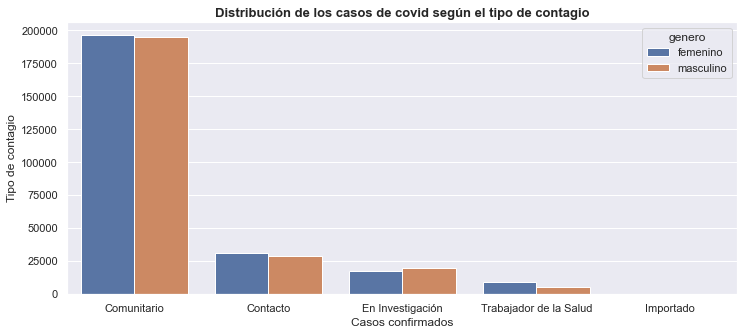

In [120]:
#PLot  
plt.figure(figsize = (12,5))
sns.set_theme(style="darkgrid")
sns.countplot(x = 'tipo_contagio',
              hue = 'genero',
              data = positivos,
              order = ['Comunitario', 'Contacto', 'En Investigación', 'Trabajador de la Salud', 'Importado'])
plt.title('Distribución de los casos de covid según el tipo de contagio', fontweight = 'bold', fontsize = 13)
plt.xlabel('Casos confirmados')
plt.ylabel('Tipo de contagio')
plt.show()

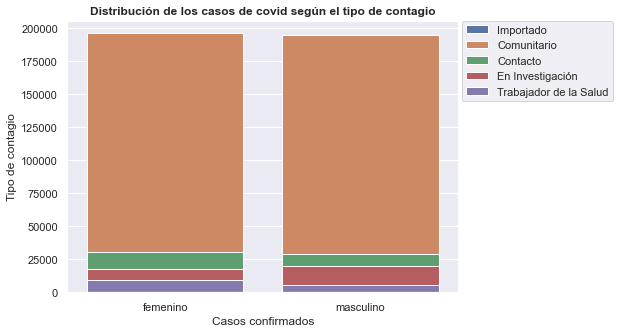

In [97]:
#PLot  
plt.figure(figsize = (7,5))
sns.set_theme(style="darkgrid")
sns.countplot(x = 'genero',
              hue = 'tipo_contagio',
              data = positivos,
              dodge = False)
plt.title('Distribución de los casos de covid según el tipo de contagio', fontweight = 'bold')
plt.xlabel('Casos confirmados')
plt.ylabel('Tipo de contagio')
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
plt.rcParams["figure.figsize"] = (7, 5)
plt.show()

__¿Hay diferencias según el género entre los casos positivos?__

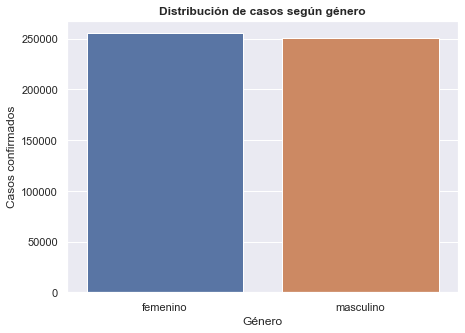

In [103]:
#ESTO ES CON CASOS CONFIRMADOS
plt.figure(figsize = (7,5))
sns.set_theme(style="darkgrid")
sns.countplot(x = 'genero', data = positivos)
plt.title('Distribución de casos según género',fontweight = 'bold')
plt.xlabel('Género')
plt.ylabel('Casos confirmados')
plt.show()

__¿Cuántos fallecidos hubo hasta la actualidad?__

In [22]:
working_data['fallecido'].value_counts()

si    18648
Name: fallecido, dtype: int64

__Cómo se distribuye la edad entre los positivos y fallecidos?__

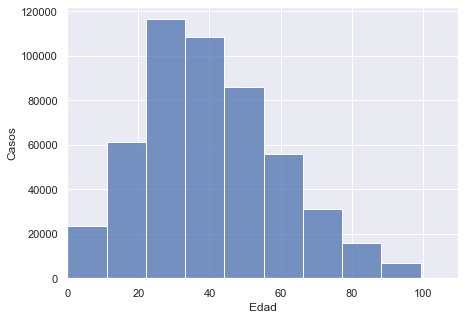

In [39]:
sns.histplot(x = 'edad', data = positivos, bins = 20)
plt.ylabel ('Casos')
plt.xlabel('Edad')
plt.xlim(0,110)
plt.rcParams["figure.figsize"] = (7, 5)

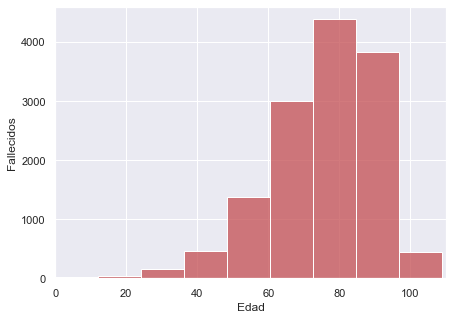

In [40]:
sns.histplot(x = 'edad', data = fallecidos, bins = 10, color = 'r')
plt.ylabel ('Fallecidos')
plt.xlabel('Edad')
plt.xlim(0,110)
plt.rcParams["figure.figsize"] = (7, 5)

### Ahora veamos solo los casos diarios

Creamos una nueva columna con que tenga el promedio de casos de los ultimos 7 días. Luego convertimos los date index en columnas y le cambiamos el nombre a 'fecha_clasificacion'

In [23]:
casos_diarios['7day_rolling_avg'] = casos_diarios.Casos.rolling(7).mean()
casos_diarios.reset_index(inplace=True)
casos_diarios = casos_diarios.rename(columns = {'index' :'fecha_clasificacion'})
casos_diarios

,fecha_clasificacion,Casos,7day_rolling_avg
0,2020-03-06,3,NaN
1,2020-03-07,1,NaN
2,2020-03-09,1,NaN
3,2020-03-10,1,NaN
4,2020-03-11,2,NaN
...,...,...,...
579,2021-10-08,90,115.428571
580,2021-10-09,78,114.428571
581,2021-10-10,95,118.285714
582,2021-10-11,98,115.285714


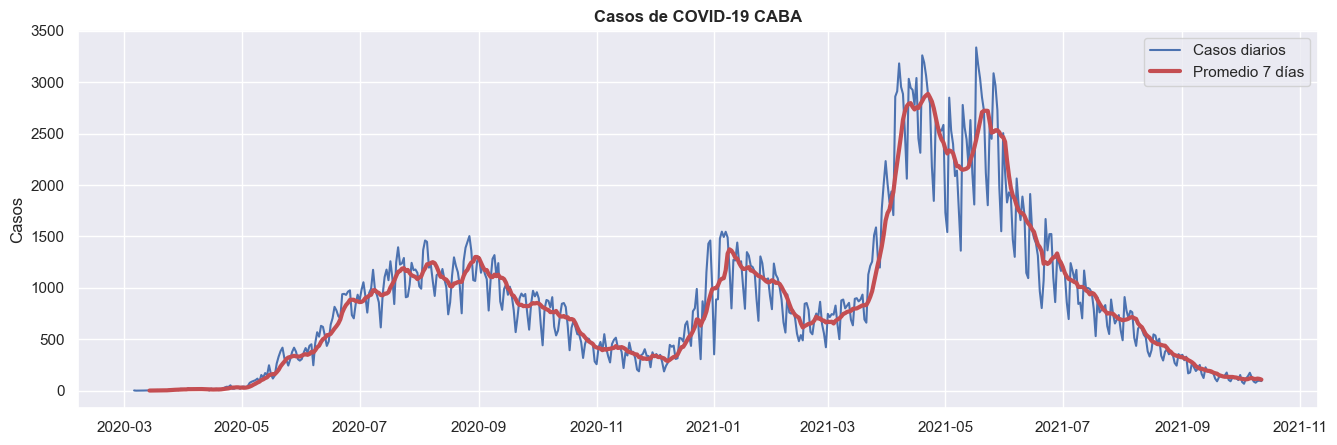

In [108]:
sns.set_theme(style="darkgrid", context = 'notebook')
plt.figure(figsize = (16,5), dpi = 100)
sns.lineplot(x = 'fecha_clasificacion',
             y = 'Casos',
             data = casos_diarios,
             label = 'Casos diarios',
             color = 'b',
             ci = None)
sns.lineplot(x = 'fecha_clasificacion',
             y = '7day_rolling_avg',
             data = casos_diarios,
             label = 'Promedio 7 días',
             linewidth = 3,
             color = 'r',
             ci = None)
plt.title('Casos de COVID-19 CABA', fontweight = 'bold')
plt.ylabel ('Casos')
plt.xlabel('')
plt.show()


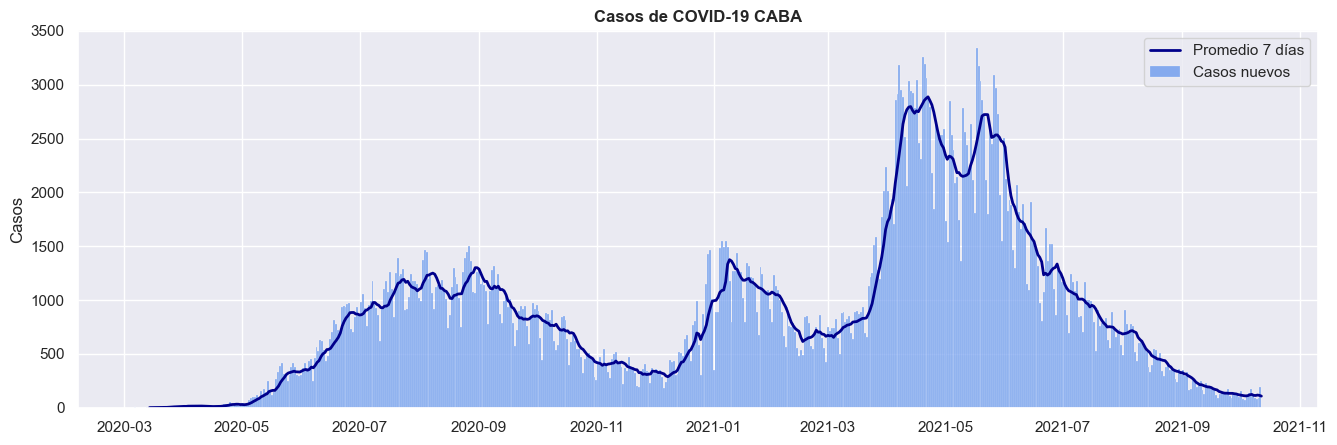

In [124]:
plt.figure(figsize = (16,5), dpi = 100)
sns.histplot(x = 'fecha_clasificacion',
             data = positivos, 
             bins = 584,
             label = 'Casos nuevos', 
             color = 'cornflowerblue')#588 porque len() de working data

sns.lineplot(x = 'fecha_clasificacion',
             y = '7day_rolling_avg',
             data = casos_diarios,
             label = 'Promedio 7 días',
             color = 'darkblue',
             linewidth = 2,
             ci = None)

plt.title('Casos de COVID-19 CABA', fontweight = 'bold')
plt.ylabel ('Casos')
plt.xlabel('')

plt.show()


In [125]:
muertes_diarias

,fecha_fallecimiento,Muertes,7_dias_promedio
0,2020-03-07,1,NaN
1,2020-03-09,1,NaN
2,2020-03-10,1,NaN
3,2020-03-15,1,NaN
4,2020-03-17,1,NaN
...,...,...,...
567,2021-10-06,2,4.142857
568,2021-10-07,1,3.571429
569,2021-10-08,1,3.000000
570,2021-10-09,1,1.857143


#### Hacemos lo mismo con FALLECIDOS DIARIOS

In [27]:
muertes_diarias['7_dias_promedio'] = muertes_diarias.Muertes.rolling(7).mean()
muertes_diarias.reset_index(inplace=True)
muertes_diarias = muertes_diarias.rename(columns = {'index' :'fecha_fallecimiento'})
muertes_diarias

,fecha_fallecimiento,Muertes,7_dias_promedio
0,2020-03-07,1,NaN
1,2020-03-09,1,NaN
2,2020-03-10,1,NaN
3,2020-03-15,1,NaN
4,2020-03-17,1,NaN
...,...,...,...
567,2021-10-06,2,4.142857
568,2021-10-07,1,3.571429
569,2021-10-08,1,3.000000
570,2021-10-09,1,1.857143


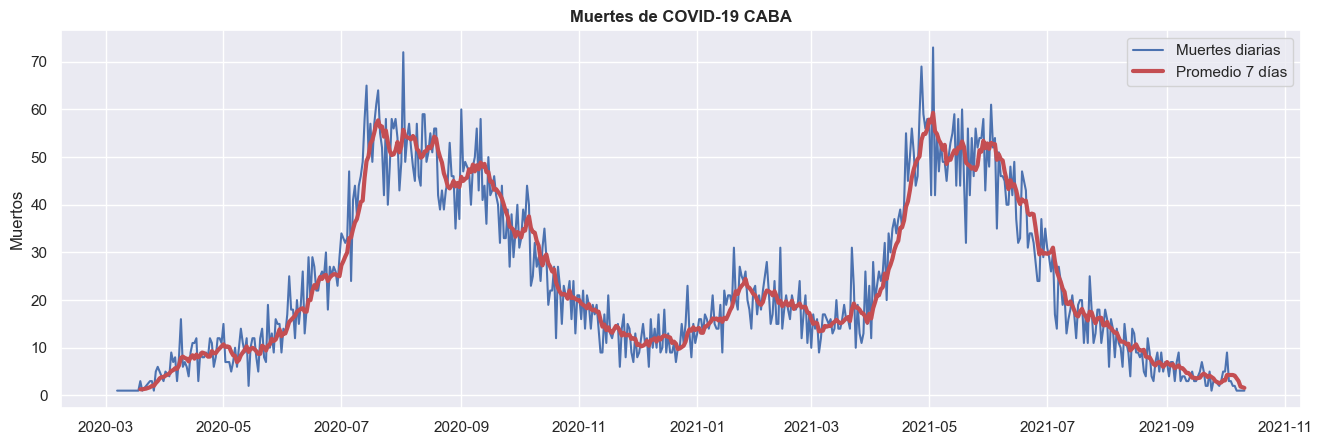

In [110]:
plt.figure(figsize = (16,5), dpi = 100)
sns.lineplot(x = 'fecha_fallecimiento',
             y = 'Muertes',
             data = muertes_diarias,
             label = 'Muertes diarias',
             color = 'b',
             ci = None)

sns.lineplot(x = 'fecha_fallecimiento',
             y = '7_dias_promedio',
             data = muertes_diarias,
             label = 'Promedio 7 días',
             linewidth = 3,
             color = 'r',
             ci = None)
plt.title('Muertes de COVID-19 CABA', fontweight = 'bold')
plt.ylabel ('Muertos')
plt.xlabel('')
plt.show()

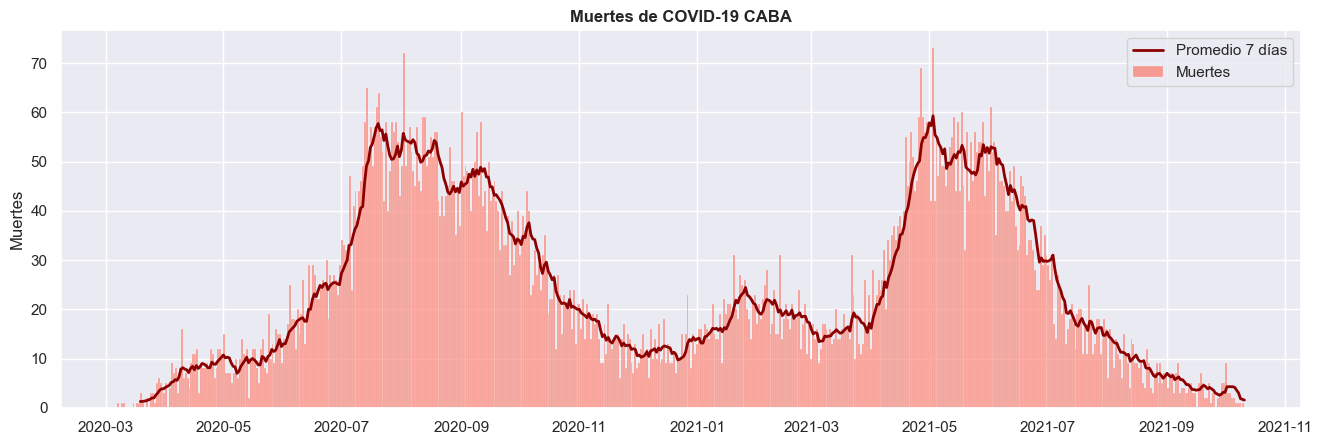

In [129]:
plt.figure(figsize = (16,5), dpi = 100)
sns.histplot(x = 'fecha_fallecimiento', data = fallecidos, bins = 584, label = 'Muertes', color = 'salmon') #588 porque len() de working data
sns.lineplot(x = 'fecha_fallecimiento', y = '7_dias_promedio', data = muertes_diarias, label = 'Promedio 7 días',color = 'darkred',linewidth = 2, ci = None )
plt.title('Muertes de COVID-19 CABA', fontweight = 'bold')
plt.ylabel ('Muertes')
plt.xlabel('')

plt.show()

In [127]:
muertes_diarias

,fecha_fallecimiento,Muertes,7_dias_promedio
0,2020-03-07,1,NaN
1,2020-03-09,1,NaN
2,2020-03-10,1,NaN
3,2020-03-15,1,NaN
4,2020-03-17,1,NaN
...,...,...,...
567,2021-10-06,2,4.142857
568,2021-10-07,1,3.571429
569,2021-10-08,1,3.000000
570,2021-10-09,1,1.857143


__Ahora unimos CASOS DIARIOS y MUERTES DIARIAS en un mismo gráfico__

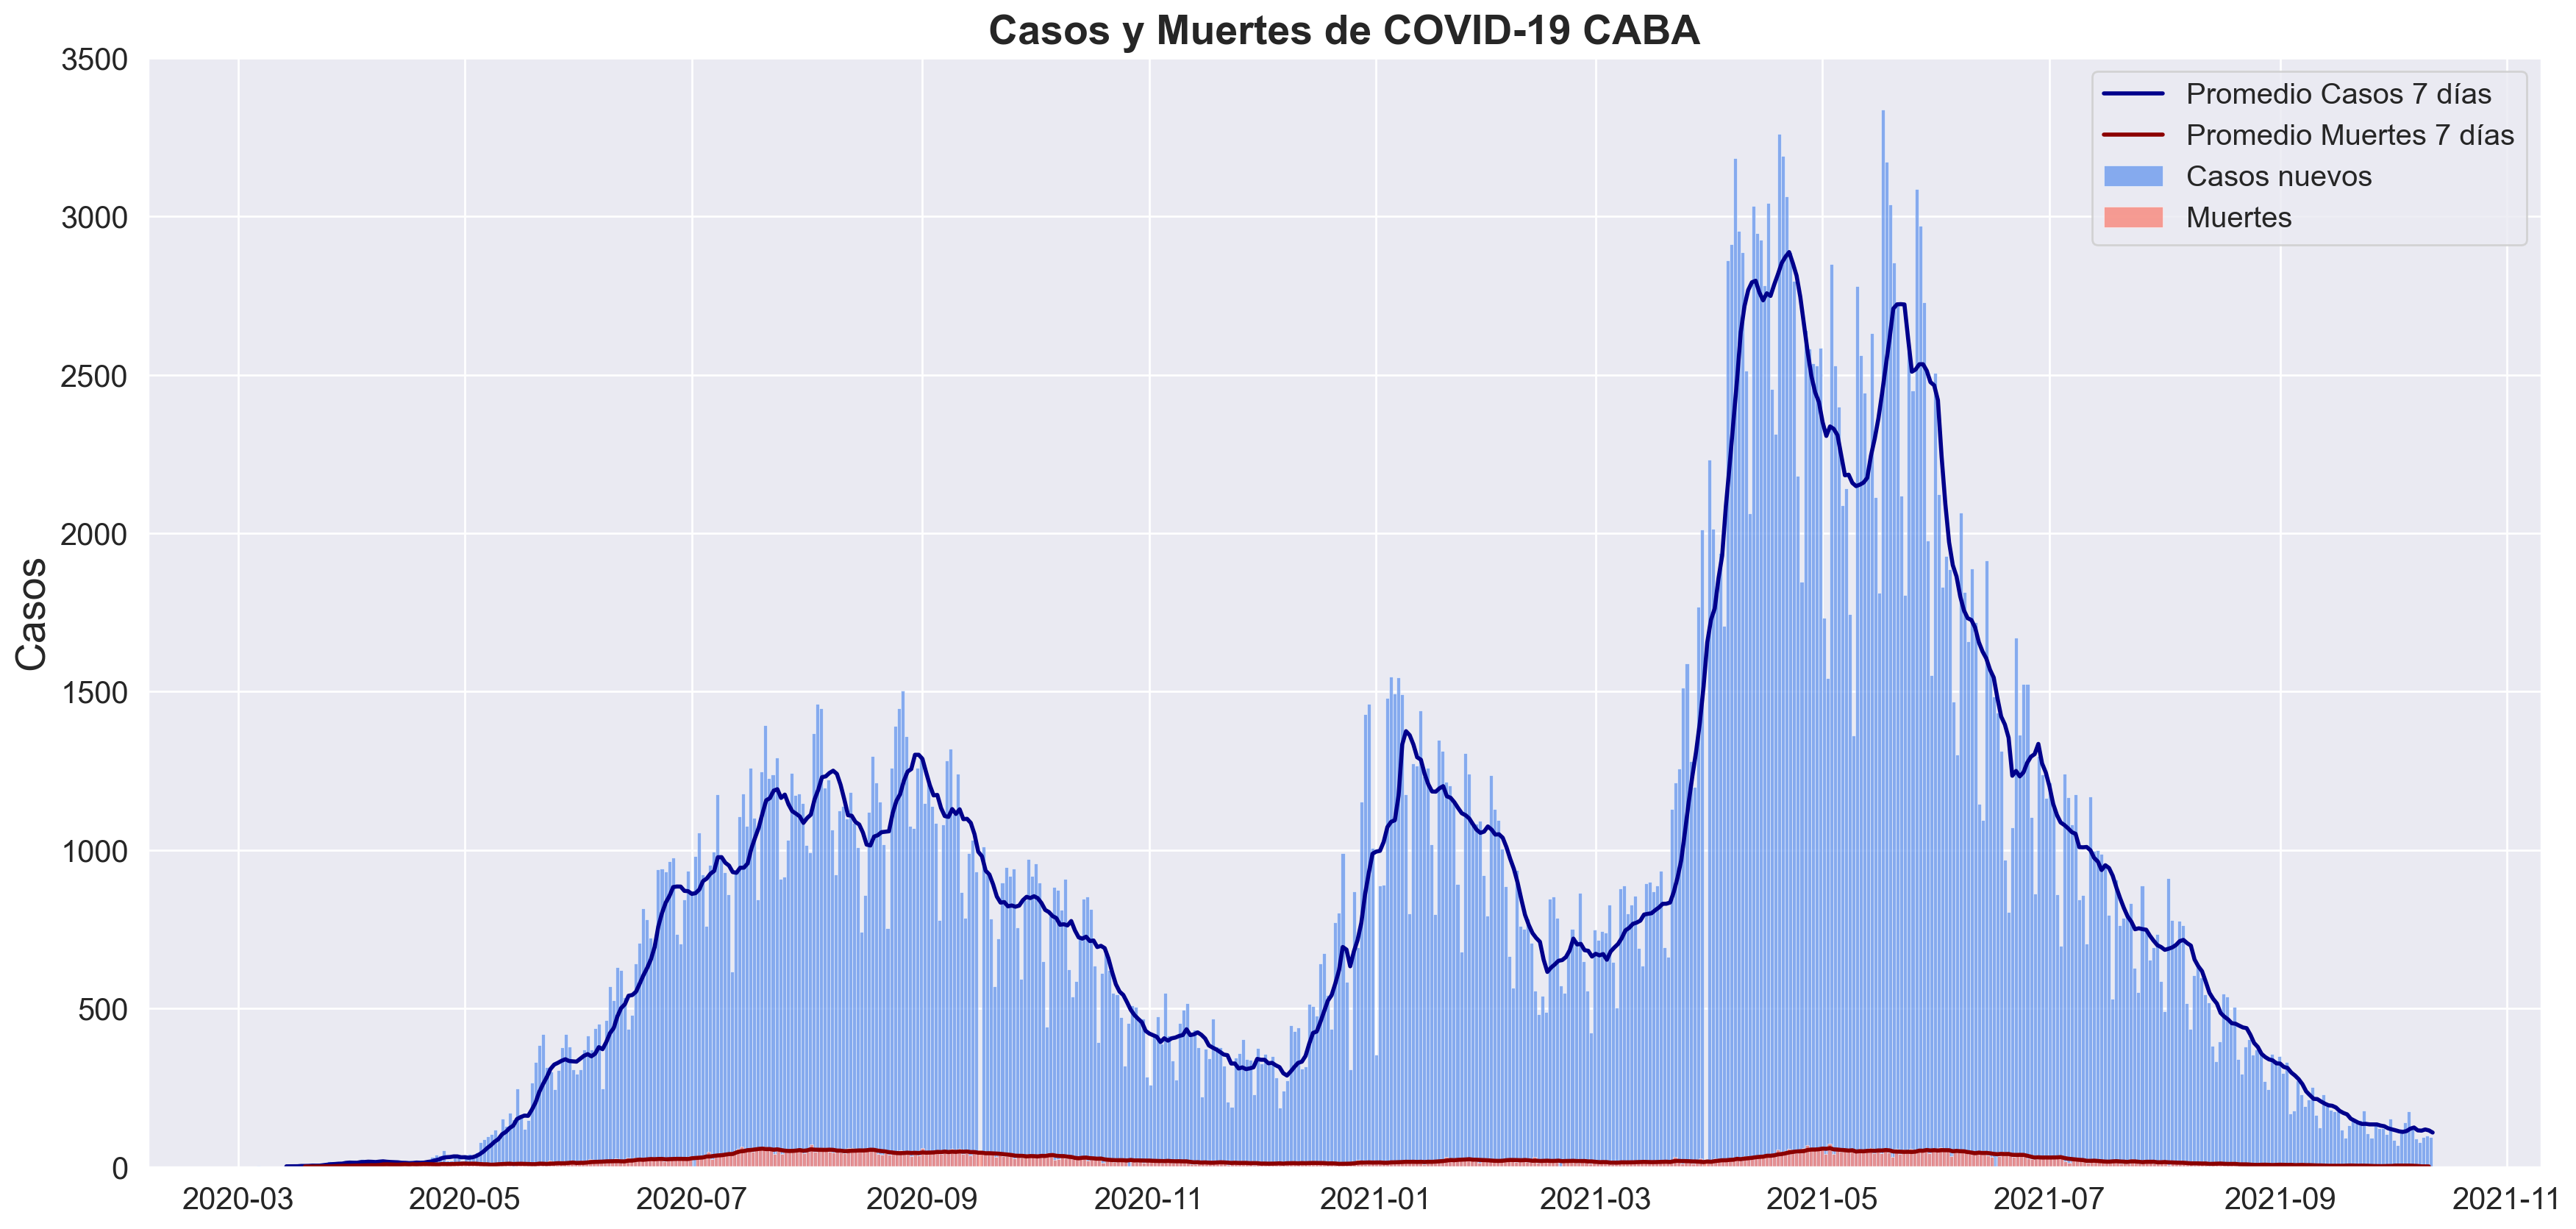

In [113]:
#Plot casos diarios
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.figure(figsize = (21,10), dpi = 200)
sns.histplot(x = 'fecha_clasificacion',
             data = positivos,
             bins = 588,
             label = 'Casos nuevos',
             color = 'cornflowerblue') #588 porque len() de working data

#PLot promedio de casos 7 dias
sns.lineplot(x = 'fecha_clasificacion',
             y = '7day_rolling_avg',
             data = casos_diarios,
             label = 'Promedio Casos 7 días',
             color = 'darkblue',
             linewidth = 2,
             ci = None)

#Plot Muertes diarias
sns.histplot(x = 'fecha_fallecimiento',
             data = fallecidos,
             bins = 588,
             label = 'Muertes',
             color = 'salmon') #588 porque len() de working data

#Plot promedio de muertes 7 dias
sns.lineplot(x = 'fecha_fallecimiento',
             y = '7_dias_promedio',
             data = muertes_diarias,
             label = 'Promedio Muertes 7 días',
             color = 'darkred',
             linewidth = 2,
             ci = None )
plt.title('Casos y Muertes de COVID-19 CABA', fontweight = 'bold', fontsize = 20)
plt.ylabel ('Casos', fontsize = 20)
plt.xlabel('')
plt.legend(fontsize = 'large')
plt.show()